In [10]:
import geopandas as gpd
import xarray as xr
import numpy as np
import os
import glob 
import rioxarray as rxr
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [13]:
#basin_path = r'/media/samuel/M.2/imagery/masters/TF_basin-TPN/OneDrive_1_11-7-2024/TF_TP-basins.shp'
basin_path = r'/Volumes/M.2/imagery/masters/TF_basin-TPN/TF_FP-basins.shp'
msm1_path = r'/Volumes/M.2/imagery/masters/output/MSM1/'

output = r'/Volumes/M.2/imagery/masters/output/global/TPN-basins/'

basin = gpd.read_file(basin_path)



In [15]:
b_match = basin['BASIN_ID'].to_list()
m_match = []
files = glob.glob(msm1_path + '*')
for f in files:
    
    file_id = int(f.split('/')[-1].split('_')[0])
    if file_id in b_match:
        m_match.append(f)

OSError: [Errno 30] Read-only file system: '/Volumes/M.2/imagery/masters/output/global/TPN-basins/10048_12mmhr_FP.png'

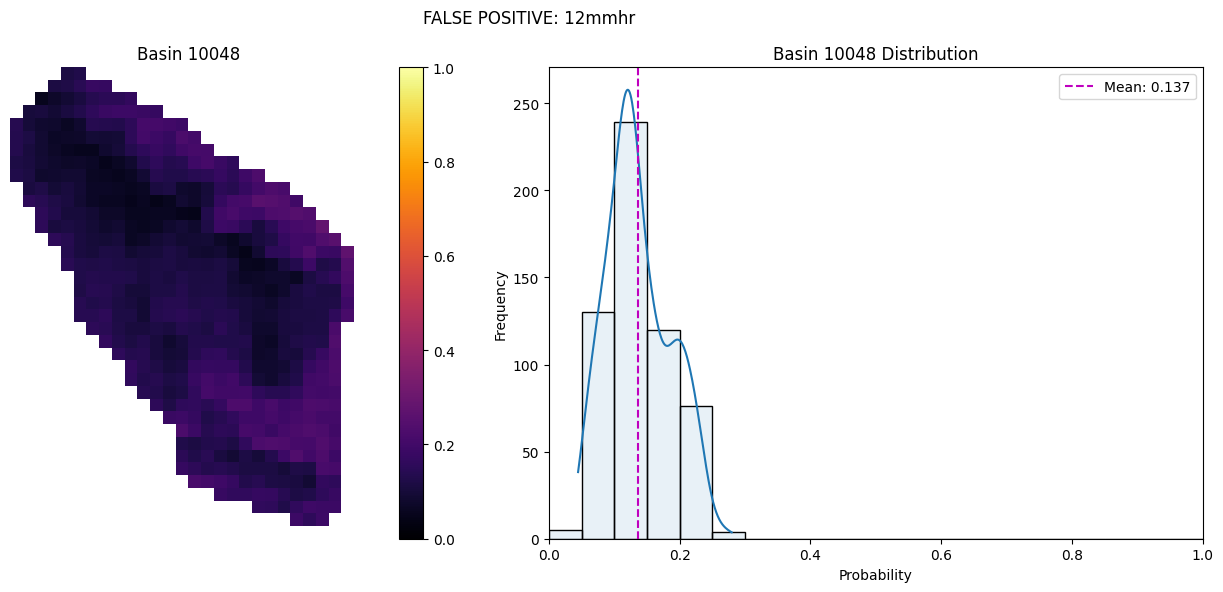

In [ ]:
for f in m_match:
    name = int(f.split('/')[-1].split('_')[0])
    match = re.search(r'\d+mmhr', f)
    mmhr = match.group()


    image = rxr.open_rasterio(f, masked=True)
    iflat = image.values.flatten()
    iflat = iflat[~np.isnan(iflat)]
    bin = np.arange(0, 1.05, 0.05)
    mean = np.mean(iflat)


    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    
    image.squeeze().plot.imshow(vmax = 1, vmin=0, cmap = 'inferno', ax=axes[0])
    axes[0].axis('off')
    axes[0].set_aspect('equal')
    axes[0].set_title(f'Basin {name}')

    
    sns.histplot(iflat, bins=bin, kde=True, alpha=.1, ax=axes[1])
    axes[1].axvline(x=mean, color='m', linestyle='--', label=f'Mean: {mean:.3f}')
    axes[1].set_xlim(0,1)
    axes[1].set_title(f'Basin {name} Distribution')
    axes[1].set_xlabel("Probability")
    axes[1].set_ylabel("Frequency")

    plt.legend(loc='best')
    plt.suptitle(f'FALSE POSITIVE: {mmhr}')
    plt.tight_layout()
    plt.savefig(os.path.join(output,f'{name}_{mmhr}_FP.png'), dpi = 300)
    plt.close(fig)
    